In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
netphish = pd.read_csv('/content/NetPhishV4.csv')
display(netphish.shape)

X = netphish.drop('class', axis=1)
y = netphish['class']

(50522, 31)

<ipython-input-21-2b30d5666869>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette="viridis")


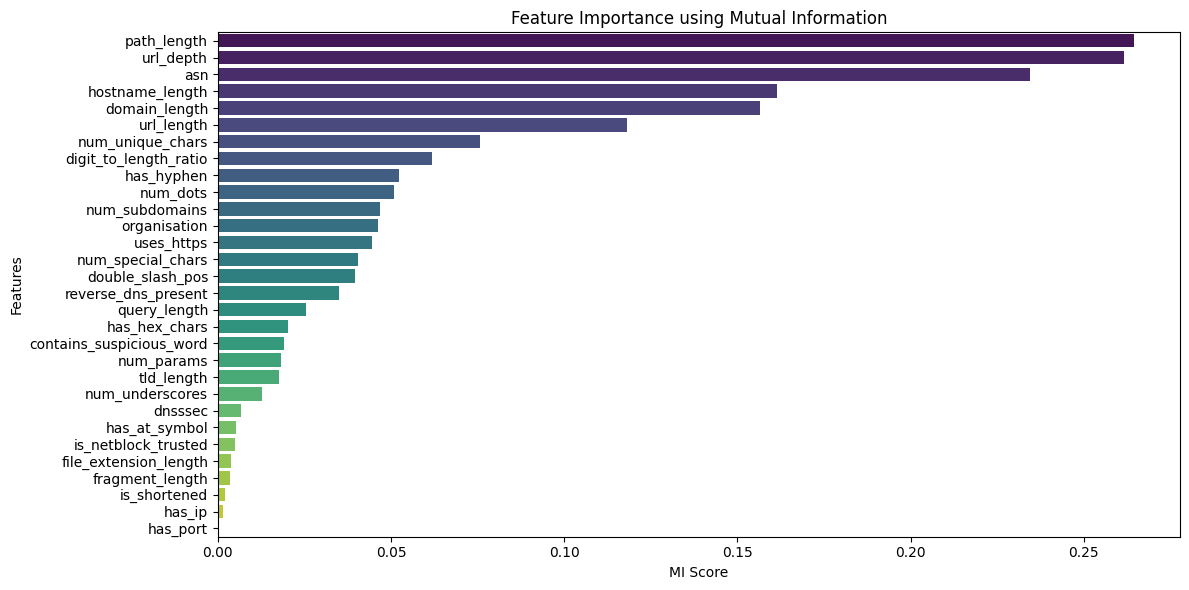

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

#print("Mutual Information Scores:")
#print(mi_scores_series)

plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette="viridis")
plt.title("Feature Importance using Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)  # Select 1 to rank all features
rfe.fit(X, y)

ranking = rfe.ranking_

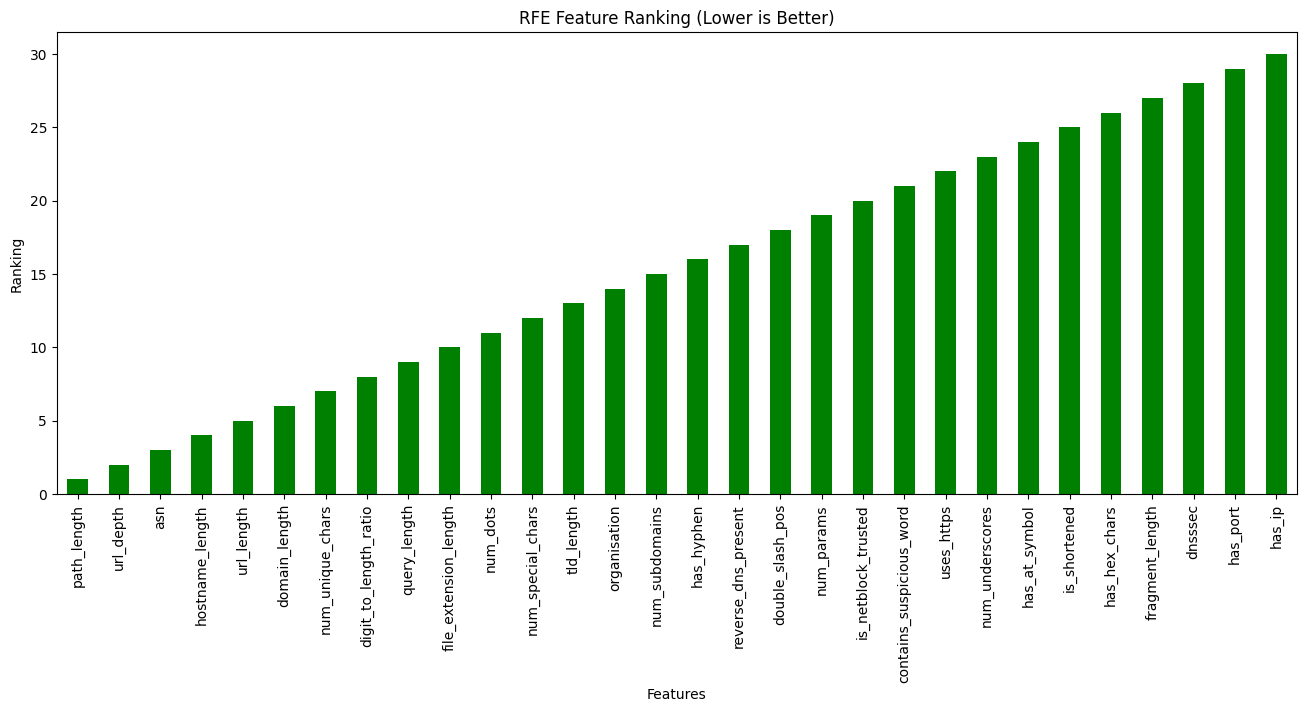

In [ ]:
feature_names = X.columns
ranking = pd.Series(rfe.ranking_, index=feature_names).sort_values()

ranking.plot(kind='bar', figsize=(16,6), color='green')
plt.title("RFE Feature Ranking (Lower is Better)")
plt.ylabel("Ranking")
plt.xlabel("Features")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-wrap into DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Then do the train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_full, y_train)

selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")

Decision Tree Results
Accuracy:  0.9284
Precision: 0.9274
Recall:    0.9289
F1 Score:  0.9281


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-wrap into DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Then do the train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_full, y_train)

# Select features
selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Random Forest Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")

Random Forest Results
Accuracy:  0.9560
Precision: 0.9716
Recall:    0.9390
F1 Score:  0.9550


In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=42, max_iter=10000)
rfe = RFE(model, n_features_to_select=20)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
rfe.fit(X_train_full, y_train)

# Select features
selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

# Train final model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\nLinear SVM (LinearSVC) Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")


Linear SVM (LinearSVC) Results
Accuracy:  0.8529
Precision: 0.8668
Recall:    0.8327
F1 Score:  0.8494


In [ ]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-wrap into DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Then do the train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model = GaussianNB()
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=20)
rfe.fit(X_train_full, y_train)

selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nNaive Bayes Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")



Naive Bayes Results
Accuracy:  0.8352
Precision: 0.8187
Recall:    0.8596
F1 Score:  0.8386


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=20)
rfe.fit(X_train_full, y_train)

selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nNaive Bayes Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")



Naive Bayes Results
Accuracy:  0.9402
Precision: 0.9437
Recall:    0.9358
F1 Score:  0.9398


In [ ]:
from xgboost import XGBClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-wrap into DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Then do the train-test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_full, y_train)

selected_features = X.columns[rfe.support_]
X_train = X_train_full[selected_features]
X_test = X_test_full[selected_features]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost Results")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:07:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:07:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:07:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:07:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Results
Accuracy:  0.9544
Precision: 0.9660
Recall:    0.9416
F1 Score:  0.9536
